In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

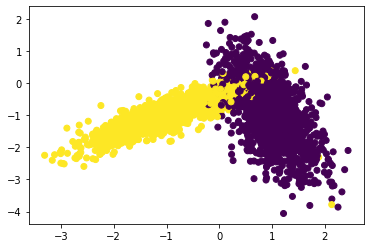

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [29]:
#Select data for training. This function directly returns training data rather than indices

def selection_of_data_for_train(x_train,k,folds):
    
    #Splits the data into (folds+1) parts.
    #[1:folds] considers the parts other than 0 and last value
    a1 = np.linspace(0,len(x_train),folds + 1)[1:folds]
    
    #Slicing of data is done based on the iteration.
    #For eg. in 1st iteration, the 1st slice of data will be considered for testing and remaining data for training.
    
    
    #For first iteration, training data is all the values except the first slice
    if k is 0:
        return x_train[int(a1[k]):]
    
    #For last iteration, training data is all the values except the last slice
    elif k is (folds-1):
        return x_train[:(int(a1[k-1]))]
    
    #during the remaining iterations the slice of iertaion number will be excluded
    else:
        return np.concatenate([x_train[:int(a1[k-1])] , x_train[int(a1[k]):]])


In [30]:
#this function returns the data for testing based in the folds and iteration value 

def selection_of_data_for_test(x_test,k,folds):
    
    #Splits the data into (folds+1) parts.
    #[1:folds] considers the parts other than 0 and last value
    a1 = np.linspace(0,len(x_test),folds + 1)[1:folds]
    
    #for first iteration, only first slice will be considered for testing
    if k is 0:
        return x_test[:int(a1[k])]
    
    #for last iteration, only last slice will be considered for testing
    elif k is (folds-1):
        return x_test[(int(a1[k-1])):]
    
    #for nth iteration, ith slice will be considered
    else:
        return np.concatenate([x_test[int(a1[k-1]):int(a1[k])]]) 


In [33]:
#implmentation of RandomSearchCV

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    trainscore = []
    testscore = []
    for k in tqdm(param_range['n_neighbour']):
        trainscores_folds = []
        testscores_folds = []
        for j in range(folds):
            
            #selection of training and test data 
            X_train = selection_of_data_for_train(x_train,j,folds)
            Y_train = selection_of_data_for_train(y_train,j,folds)
            X_test  = selection_of_data_for_test(x_train,j,folds)
            Y_test  = selection_of_data_for_test(y_train,j,folds)

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscore.append(np.mean(np.array(trainscores_folds)))
        testscore.append(np.mean(np.array(testscores_folds)))
    return trainscore,testscore


Parameters
{'n_neighbour': [4, 21, 23, 29, 30, 31, 33, 37, 45, 48]}



100%|██████████| 10/10 [00:12<00:00,  1.33s/it]

Training scores
[0.9624666666666667, 0.9572666666666666, 0.9571999999999999, 0.9578000000000001, 0.9575333333333332, 0.9574666666666666, 0.9575999999999999, 0.9579333333333334, 0.9578000000000001, 0.9579999999999999]


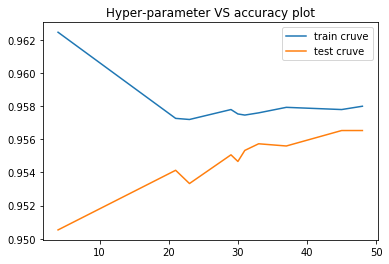

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

#KNN classifier object
neigh = KNeighborsClassifier()

#a random uniform distributed values between a and b are considered in sorted order
list1 = list(range(1,50))
params = {'n_neighbour':sorted(random.sample(list1,10))}
print("Parameters")
print(params)

folds = 3

trainscores, testscores = RandomSearchCV(X_train,y_train,neigh,params,folds)

print("Training scores")
print(trainscores)
plt.plot(params['n_neighbour'],trainscores, label='train cruve')
plt.plot(params['n_neighbour'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()


In [40]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

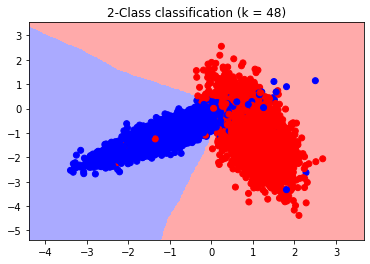

In [41]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 48)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)